# Import Libraries and Load Dataset

In [1]:
#import pertinent libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import scipy.stats as stats
from sklearn.metrics import mean_squared_error
import math
#import data frame and inspect variables
kc = pd.read_csv('kc_house_data.csv')
kc.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


# Data Inspection and Cleaning

### Checking for missing data points

In [2]:
kc.info()
print('----Missing Values----')
display(kc.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB
----Missing 

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [3]:
display(kc.isna().sum())

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

###  Checking for Extraneous Values

In [4]:
#checking for extraneous values
for col in kc.columns:
    print(col, '\n', kc[col].value_counts(normalize=True).head(), '\n\n')

id 
 795000620     0.000139
1825069031    0.000093
2019200220    0.000093
7129304540    0.000093
1781500435    0.000093
Name: id, dtype: float64 


date 
 6/23/2014    0.006575
6/26/2014    0.006066
6/25/2014    0.006066
7/8/2014     0.005880
4/27/2015    0.005834
Name: date, dtype: float64 


price 
 350000.0    0.007964
450000.0    0.007964
550000.0    0.007362
500000.0    0.007038
425000.0    0.006945
Name: price, dtype: float64 


bedrooms 
 3    0.454878
4    0.318655
2    0.127796
5    0.074131
6    0.012594
Name: bedrooms, dtype: float64 


bathrooms 
 2.50    0.248970
1.00    0.178312
1.75    0.141131
2.25    0.094782
2.00    0.089364
Name: bathrooms, dtype: float64 


sqft_living 
 1300    0.006390
1400    0.006251
1440    0.006158
1660    0.005973
1010    0.005973
Name: sqft_living, dtype: float64 


sqft_lot 
 5000    0.016576
6000    0.013428
4000    0.011622
7200    0.010187
7500    0.005510
Name: sqft_lot, dtype: float64 


floors 
 1.0    0.494189
2.0    0.381303
1.5    

###  Checking for Duplicated Data Points

In [5]:
#checking for duplicate data points
duplicates = kc[kc.duplicated()]
print(str(len(duplicates))  + ' duplicates')
duplicates.head()

0 duplicates


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


Will need to address the 2% of values in sqft_basement at value '?'

### Addressing Missing Data Points

#### kc['view]

In [6]:
display(kc['view'].value_counts(normalize=True))
print('----Mode----')
print(kc['view'].mode())
print('----Median----')
print(kc['view'].median())

0.0    0.901923
2.0    0.044441
3.0    0.023591
1.0    0.015325
4.0    0.014721
Name: view, dtype: float64

----Mode----
0    0.0
dtype: float64
----Median----
0.0


Null values within 'view' will be filled with 0. 0 was chosen due to it being the median, and mode. 0 comprises 90% of values within 'view', making it the most likely entry.

In [7]:
kc['view'].fillna(0, inplace=True)
display(kc['view'].isna().sum())

0

kc['view'] missing values are now 0.

#### kc['waterfront']

In [8]:
display(kc['waterfront'].value_counts(normalize=True))
print('----Mode----')
print(kc['waterfront'].mode())
print('----Median----')
print(kc['waterfront'].median())
print('----Mean----')
print(kc['waterfront'].mean())

0.0    0.992404
1.0    0.007596
Name: waterfront, dtype: float64

----Mode----
0    0.0
dtype: float64
----Median----
0.0
----Mean----
0.007595858696217679


Null values within 'waterfront' will be filled with 0s. All measures of centrality (mean, median, mode) are 0. 
The missing values have a high likelihood of being 0 as a result considering 99% of present values are 0.

In [9]:
kc['waterfront'].fillna(0, inplace=True)
display(kc['waterfront'].isna().sum())

0

kc['waterfront'] missing values are now 0.

#### kc['yr_renovated']

In [10]:
print('----Mode----')
print(kc['yr_renovated'].mode())
print('----Median----')
print(kc['yr_renovated'].median())
print('----Mean----')
print(kc['yr_renovated'].mean())

----Mode----
0    0.0
dtype: float64
----Median----
0.0
----Mean----
83.6367783722895


Value_count was excluded due to lack of useful info:

In [11]:
kc['yr_renovated'].fillna(0, inplace=True)
display(kc['yr_renovated'].isna().sum())

0

Null values within 'yr_renovated' will be filled with 0s. The mode and median are 0.

#### kc['sqft_basement']

Column must be converted to the float data type:

In [12]:
kc['sqft_basement'].replace(to_replace=['?'], value='0', inplace=True)
kc.sqft_basement = kc.sqft_basement.astype(float)

In [13]:
print('----Mode----')
print(kc['sqft_basement'].mode())
print('----Median----')
print(kc['sqft_basement'].median())
print('----Mean----')
print(kc['sqft_basement'].mean())

----Mode----
0    0.0
dtype: float64
----Median----
0.0
----Mean----
285.7165810066213


###   Basic Statistical Analysis

In [14]:
round(kc.describe(), 2)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00
mean,4.580474e+09,540296.57,3.37,2.12,2080.32,15099.41,1.49,0.01,0.23,3.41,7.66,1788.60,285.72,1971.00,68.76,98077.95,47.56,-122.21,1986.62,12758.28
std,2.876736e+09,367368.14,0.93,0.77,918.11,41412.64,0.54,0.08,0.76,0.65,1.17,827.76,439.82,29.38,364.04,53.51,0.14,0.14,685.23,27274.44
min,1.000102e+06,78000.00,1.00,0.50,370.00,520.00,1.00,0.00,0.00,1.00,3.00,370.00,0.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2.123049e+09,322000.00,3.00,1.75,1430.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,0.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3.904930e+09,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,0.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7.308900e+09,645000.00,4.00,2.50,2550.00,10685.00,2.00,0.00,0.00,4.00,8.00,2210.00,550.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,9.900000e+09,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,4820.00,2015.00,2015.00,98199.00,47.78,-121.32,6210.00,871200.00


Checking data distributions:

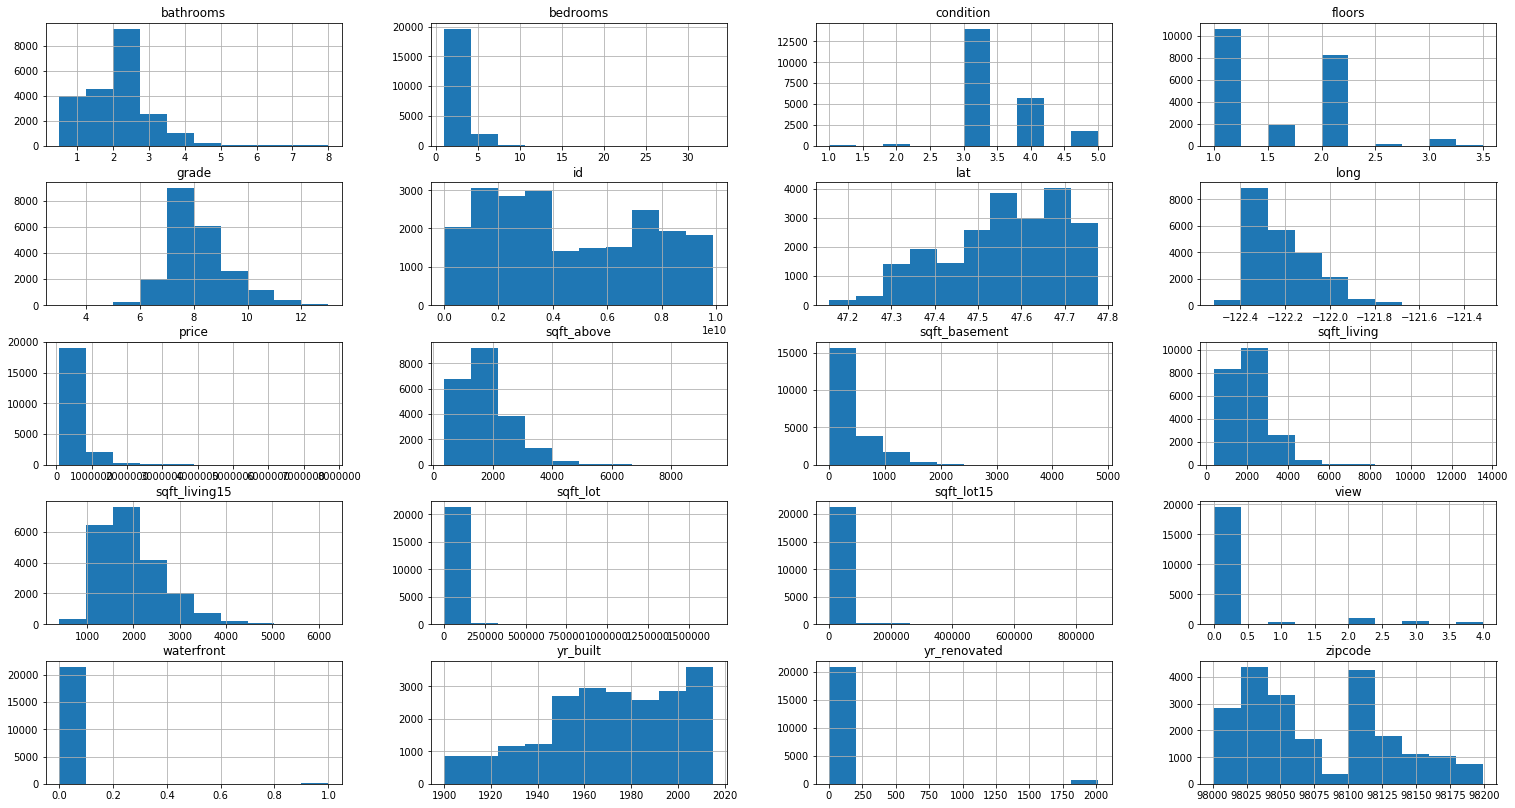

In [15]:
kc.hist(figsize=(26,14));

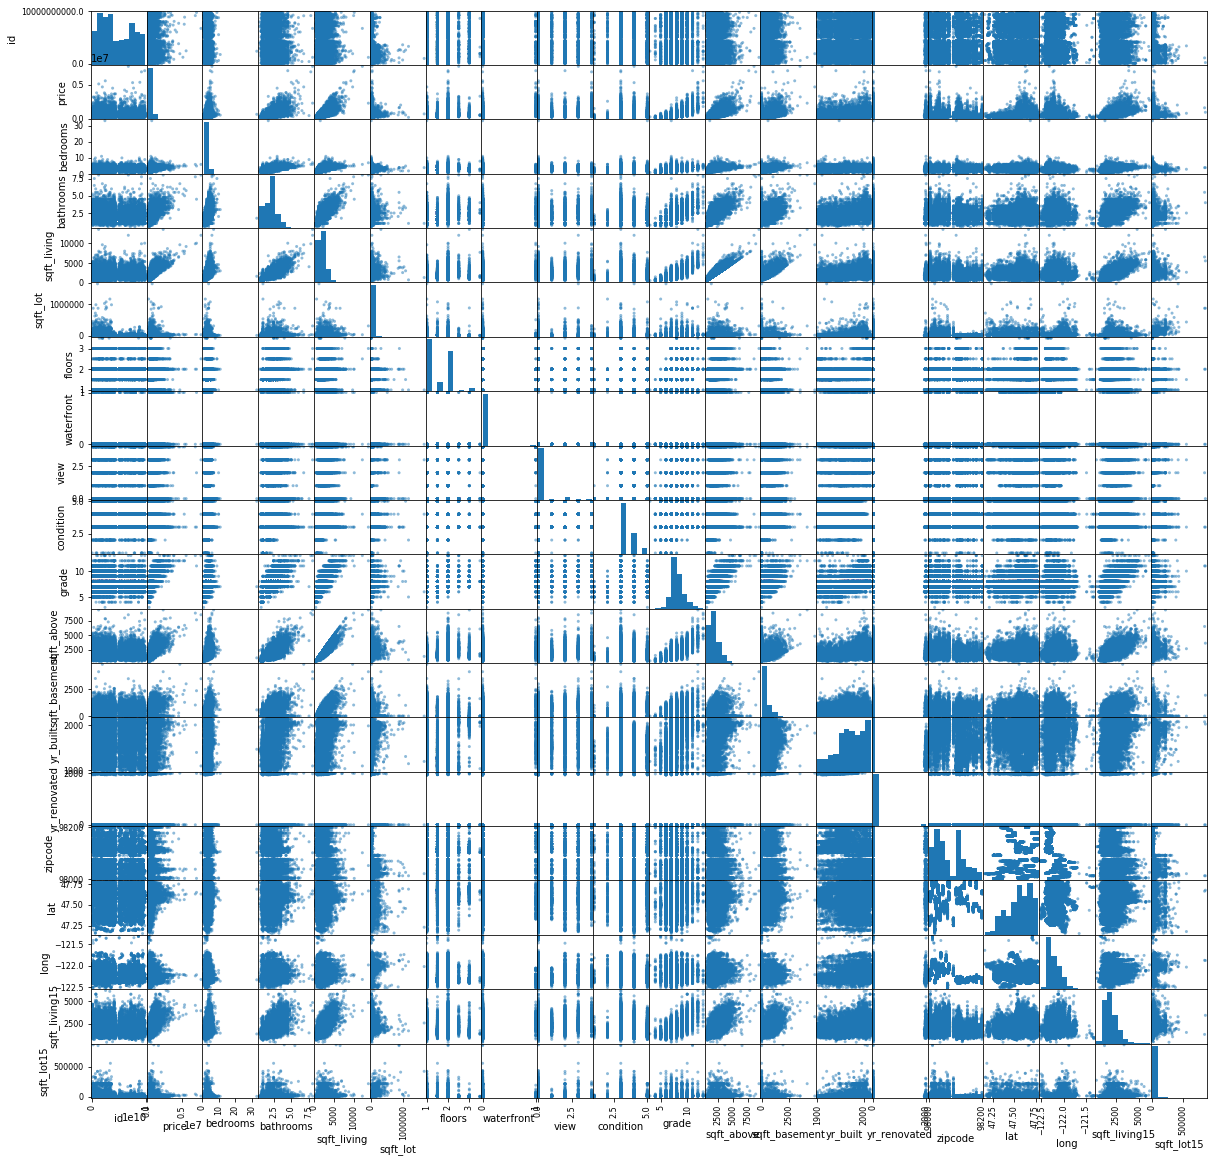

In [16]:
pd.plotting.scatter_matrix(kc,figsize=[20, 20]);

### Checking for and minimizing multicollinearity.

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
price,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,False,True,True,False,False,False,False,False,True,True,False,False,False,False,False,False,True,False
sqft_lot,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False


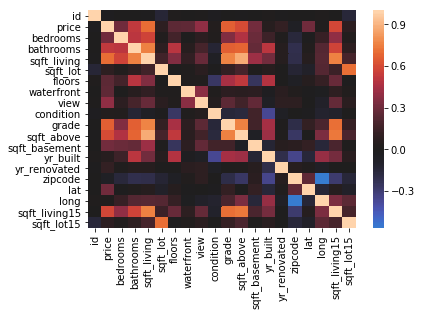

In [17]:
sns.heatmap(kc.corr(), center = 0)
display(abs(kc.corr()) > .75)

#### Removing highly correlated variables

In [18]:
Ckc = kc

In [19]:
Ckc = Ckc.drop('sqft_living15', axis=1)

sqft_living15 is highly correlated with multipled variables.

In [20]:
Ckc = Ckc.drop('sqft_above', axis=1)

In [21]:
Ckc = Ckc.drop('bathrooms', axis=1)

In [22]:
Ckc = Ckc.drop('grade', axis=1)

Removing kc.id and kc.date. No valueble info in those identifiers. 

In [23]:
Ckc = Ckc.drop('id', axis=1)

In [24]:
Ckc = Ckc.drop('date', axis=1)

In [25]:
Ckc.head()

,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_lot15
0,221900.0,3,1180,5650,1.0,0.0,0.0,3,0.0,1955,0.0,98178,47.5112,-122.257,5650
1,538000.0,3,2570,7242,2.0,0.0,0.0,3,400.0,1951,1991.0,98125,47.7210,-122.319,7639
2,180000.0,2,770,10000,1.0,0.0,0.0,3,0.0,1933,0.0,98028,47.7379,-122.233,8062
3,604000.0,4,1960,5000,1.0,0.0,0.0,5,910.0,1965,0.0,98136,47.5208,-122.393,5000
4,510000.0,3,1680,8080,1.0,0.0,0.0,3,0.0,1987,0.0,98074,47.6168,-122.045,7503


Replacing bogus values since the original dataframe was recalled:

In [26]:
Ckc['sqft_basement'].replace(to_replace=['?'], value='0', inplace=True)

Double checking correlation to ensure multicollinearity was addresed:

,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_lot15
price,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
sqft_lot,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
sqft_basement,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
yr_built,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


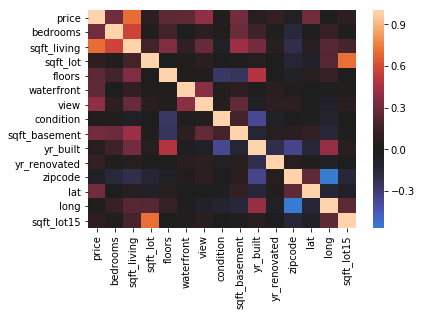

In [27]:
sns.heatmap(Ckc.corr(), center = 0)
display(abs(Ckc.corr()) > .75)

Checking Variable Distributions

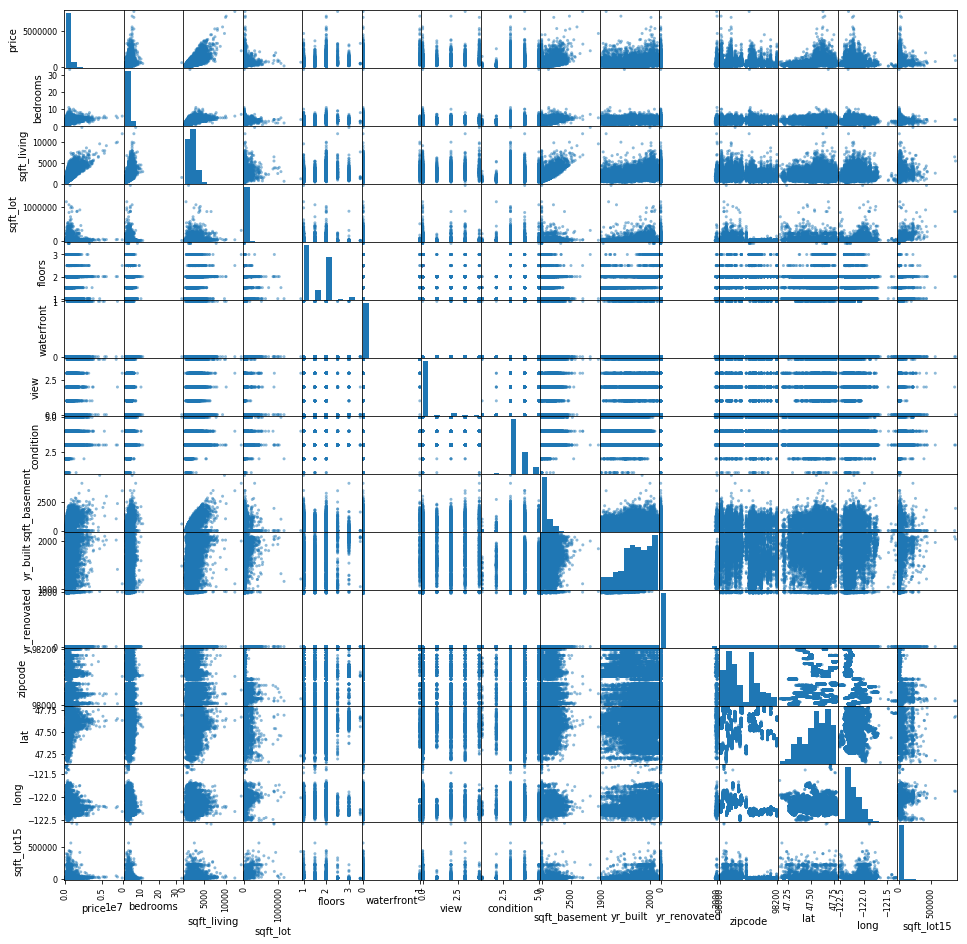

In [28]:
pd.plotting.scatter_matrix(Ckc, figsize=[16,16]);

Log Tranformation of skewed distributions:

In [29]:
Ckc.sqft_lot15 = np.log(Ckc.sqft_lot15)

In [30]:
Ckc.sqft_lot = np.log(Ckc.sqft_lot)

In [31]:
Ckc.yr_built = np.log(Ckc.yr_built)

In [32]:
Ckc.floors = np.log(Ckc.floors)

In [33]:
Ckc.bedrooms = np.log(Ckc.bedrooms)

Confirming transformation of targeted variables below:

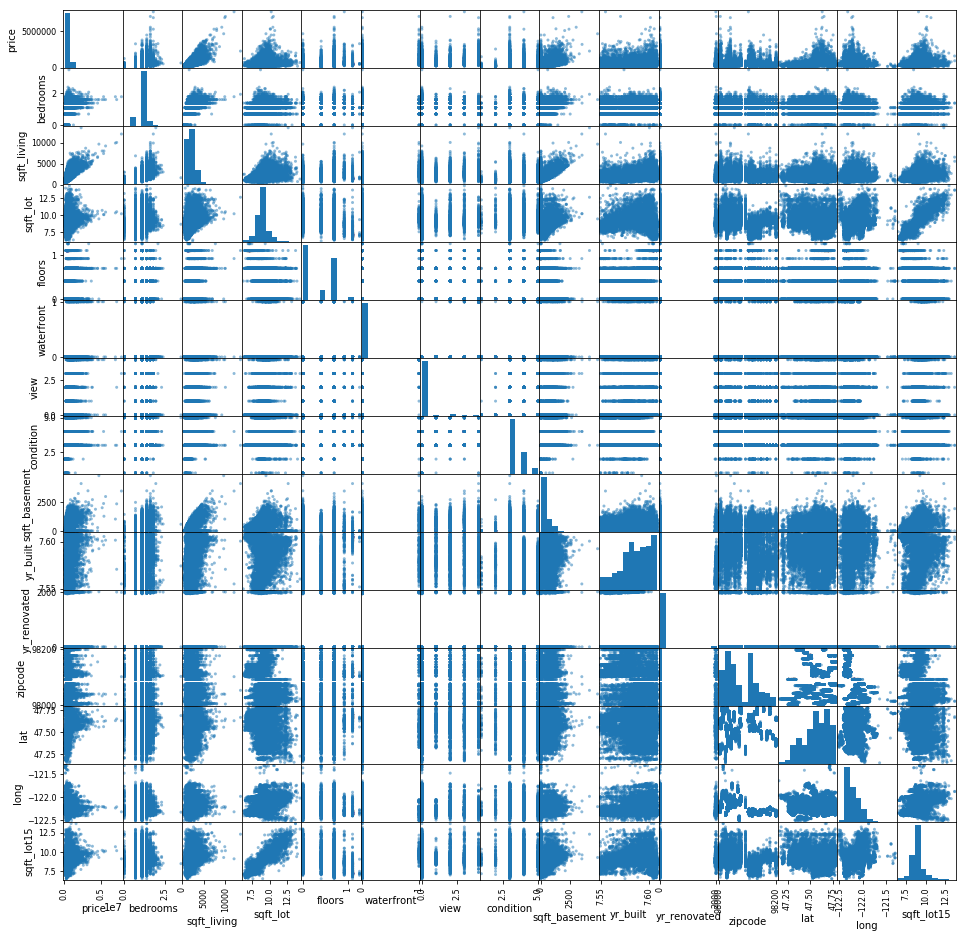

In [34]:
pd.plotting.scatter_matrix(Ckc, figsize=[16,16]);

Attempted to convert Ckc.sqft_basement and Ckc.yr_renovated but encountered 0 error despite
converting to small values, .001.

### Developing a Regression Model

In [35]:
for column in Ckc:
    Ckc[column] = Ckc[column].astype(float)

In [36]:
outcome = 'price'
predictors = Ckc.drop('price', axis=1)
Ckc_sum = '+'.join(predictors.columns)
formula = outcome + '~' + Ckc_sum

In [37]:
model = ols(formula=formula, data=Ckc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     3058.
Date:                Mon, 08 Jul 2019   Prob (F-statistic):               0.00
Time:                        13:15:29   Log-Likelihood:            -2.9559e+05
No. Observations:               21597   AIC:                         5.912e+05
Df Residuals:                   21582   BIC:                         5.913e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       3.27e+07   3.54e+06      9.231      0.000    2.58e+07    3.96e+07
bedrooms      -1.457e+05   6390.217    -22.808      0.000   -1.58e+05   -1.33e+05
sqft_living     318.8158      2.830    112.640      0.000     313.268     324.364
sqft_lot      -2.022e+04   4225.777     -4.784      0.000   -2.85e+04   -1.19e+04
floors         1.139e+04   6108.135      1.865      0.062    -583.409    2.34e+04
waterfront      5.96e+05   1.92e+04     31.075      0.000    5.58e+05    6.34e+05
view           7.098e+04   2193.487     32.362      0.000    6.67e+04    7.53e+04
condition      3.114e+04   2477.779     12.569      0.000    2.63e+04     3.6e+04
sqft_basement   -76.6356      4.570    -16.769      0.000     -85.593     -67.678
yr_built      -2.883e+06   1.35e+05    -21.322      0.000   -3.15e+06   -2.62e+06
yr_renovated     35.2610      4.167      8.462      0.000      27.094      43.428
zipcode        -749.1309     34.683    -21.599      0.000    -817.113    -681.149
lat            6.913e+05   1.12e+04     61.864      0.000    6.69e+05    7.13e+05
long          -2.452e+05   1.39e+04    -17.593      0.000   -2.73e+05   -2.18e+05
sqft_lot15    -9774.6761   4555.973     -2.145      0.032   -1.87e+04    -844.633
==============================================================================
Omnibus:                    15149.875   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           809022.411
Skew:                           2.790   Prob(JB):                         0.00
Kurtosis:                      32.460   Cond. No.                     2.40e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.4e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Though p-value is significant, the model is not reliable. High kurtosis and conditional number.

All variables within the model have a significant relationship to price with the exclusion of floors. Though the model displays significant p-values, kurtosis and the conditional numbers were high, making the model unreliable.

### Regression Diagnostics

#### Normality Check (Q-Q plots)

C:\Users\Desmond\Anaconda3\envs\learn-env\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


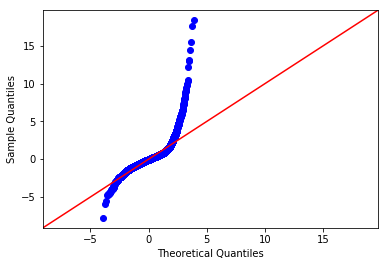

In [38]:
resid = model.resid
fig = sm.graphics.qqplot(resid, dist=stats.norm, line='45', fit=True)
fig.show()

Model shows marked kurtosis and fails to meet assumption of normality.

#### Train-Test-Split

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
y = Ckc['price']
X = Ckc.drop(['price'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y)
print(len(X_train), len(X_test), len(y_train), len(y_test))

16197 5400 16197 5400


In [40]:
for column in Ckc:
    Ckc[column] = Ckc[column].astype(float)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)
print((y_hat_train), (y_hat_test))

[301442.14546506  80601.38508035 660124.2756454  ... 696631.03830505
 256896.82542363 504109.26534545] [585961.63393886 339452.75846045 499607.66888342 ... 323775.11437016
 126079.26347753 323051.81248506]


In [41]:
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [42]:
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)
math.sqrt(test_mse)

Train Mean Squarred Error: 42764224515.31951
Test Mean Squarred Error: 52882486001.41003


229961.92293814648

MSEs are too different to suggest the model is reliable enough.

### EDA

Replicating conditions of final regression model.

In [43]:
Ckc = kc

In [44]:
Ckc = Ckc.drop('sqft_living', axis=1)
Ckc = Ckc.drop('sqft_living15', axis=1)
Ckc = Ckc.drop('sqft_above', axis=1)
Ckc = Ckc.drop('bathrooms', axis=1)
Ckc = Ckc.drop('grade', axis=1)
Ckc = Ckc.drop('id', axis=1)
Ckc = Ckc.drop('date', axis=1)
Ckc['sqft_basement'].replace(to_replace=['?'], value='0', inplace=True)

#### Do condition and waterfront statues positively modulate price of housing?

In [45]:
Ckc.head()

,price,bedrooms,sqft_lot,floors,waterfront,view,condition,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_lot15
0,221900.0,3,5650,1.0,0.0,0.0,3,0.0,1955,0.0,98178,47.5112,-122.257,5650
1,538000.0,3,7242,2.0,0.0,0.0,3,400.0,1951,1991.0,98125,47.7210,-122.319,7639
2,180000.0,2,10000,1.0,0.0,0.0,3,0.0,1933,0.0,98028,47.7379,-122.233,8062
3,604000.0,4,5000,1.0,0.0,0.0,5,910.0,1965,0.0,98136,47.5208,-122.393,5000
4,510000.0,3,8080,1.0,0.0,0.0,3,0.0,1987,0.0,98074,47.6168,-122.045,7503


In [47]:
Ckc['Waterfront'] = np.where(Ckc.waterfront == 0, 'No', 'Yes')

In [48]:
plt.style.use('fivethirtyeight')

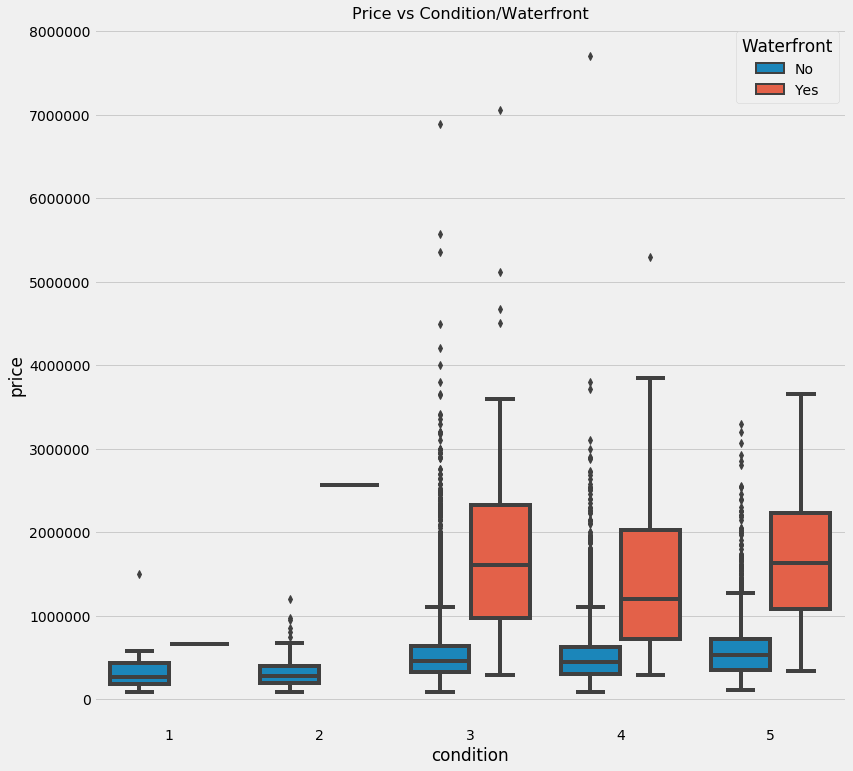

In [49]:
plt.figure(figsize=(12,12))
sns.boxplot(Ckc['condition'], Ckc['price'], hue=Ckc['Waterfront'])

plt.title('Price vs Condition/Waterfront', fontsize=16)

plt.ylabel('price')
plt.xlabel('condition')
plt.show()

Conditions ratings of 3 and 5 display highest median value across waterfront and non-waterfront properties. 

#### Is housing price influenced by square footage of neighboring spaces?

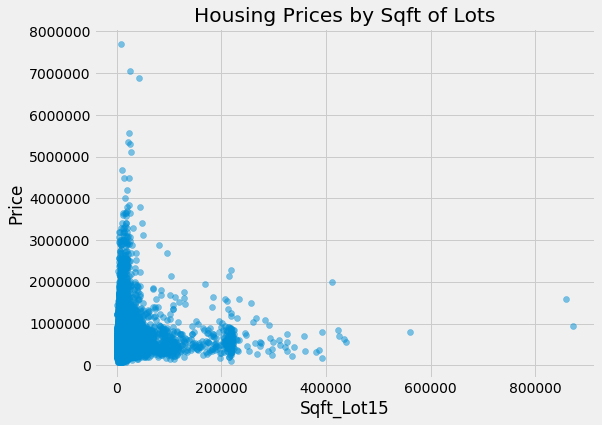

In [50]:
plt.figure(figsize=(8,6))
plt.scatter(y='price', x='sqft_lot15', data=Ckc, alpha=.5)

plt.title('Housing Prices by Sqft of Lots')
plt.xlabel(('sqft_lot15').title())
plt.ylabel(('price').title())
plt.show()

#### Does the floor count of a home necessitate higher home price?

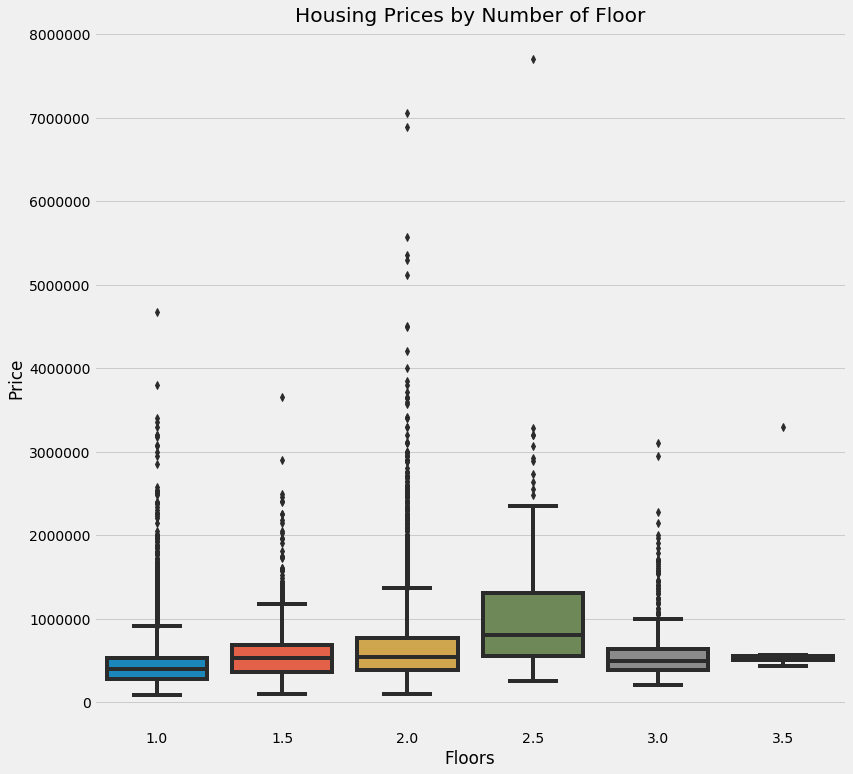

In [51]:
plt.figure(figsize=(12,12))
sns.boxplot(Ckc['floors'], Ckc['price'])

plt.title('Housing Prices by Number of Floor')
plt.xlabel(('floors').title())
plt.ylabel(('price').title())
plt.show()

2.5 floors has the greatest average price. After that, there are marginal increases in average home price.